### <span style='color:palegreen'>Codecademy project: clean US census data</span>

In [42]:
# imports
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

In [2]:
# set folder path
input_folder = r'/Users/alexandrabrown/Desktop/data_science/datasets/cleaning_US_census_data'

# create list of full paths to each csv
files = glob.glob(f'{input_folder}/states*.csv')

# empty list for storing dfs
df_list = []

# iterate over files and load into df
for file in files:
    data = pd.read_csv(file)
    df_list.append(data)

# create master df
df = pd.concat(df_list).reset_index(drop=True)
df

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,"$59,125.27",510388M_543273F
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,"$46,296.81",2322409M_2455167F
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,"$51,805.41",423477M_419713F
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,"$47,328.08",3167756M_3331859F
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,"$55,874.52",13171316M_13367298F
5,5,Utah,2903379,13.47%,79.41%,1.02%,1.08%,2.20%,0.83%,"$63,488.92",1459229M_1444150F
6,0,Utah,2903379,13.47%,79.41%,1.02%,1.08%,2.20%,0.83%,"$63,488.92",1459229M_1444150F
7,1,Vermont,626604,1.61%,93.98%,0.98%,0.30%,1.24%,0.03%,"$55,602.97",308573M_318031F
8,2,Virginia,8256630,8.01%,63.27%,20.18%,0.21%,5.46%,0.06%,"$72,866.01",4060948M_4195682F
9,3,Washington,6985464,11.14%,72.04%,3.38%,1.41%,7.02%,0.61%,"$64,493.77",3487725M_3497739F


In [ ]:
# check data types in the df
print(df.dtypes)

In [3]:
# convert income col into numeric type using regex
# remove $
df['Income'] = df['Income'].str.replace('$', '')
# remove commas
df['Income'] = df['Income'].str.replace(',', '')
# convert to numeric
df['Income'] = pd.to_numeric(df['Income'])
print(df.dtypes)

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
dtype: object


/var/folders/k7/vjfl2s9s5xz88f0n42dy5x240000gn/T/ipykernel_2384/1836507291.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Income'] = df['Income'].str.replace('$', '')


In [4]:
# split the GenderPop into 2 cols
split_gen = df['GenderPop'].str.split('_', expand=True)

# rename cols by gener
split_gen = split_gen.rename(columns={0:'Males', 1:'Females'})
# get rid of M and F from entries
split_gen['Males'] = split_gen['Males'].str.replace('M', '')
split_gen['Females'] = split_gen['Females'].str.replace('F', '')
# convert data types to numeric
split_gen[['Males', 'Females']] = split_gen[['Males', 'Females']].apply(pd.to_numeric)

# concat split_gen into the existing df
df = pd.concat([df, split_gen], axis=1)
df.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
Males           int64
Females       float64
dtype: object

In [ ]:
df.head()

#### <span style='color:palegreen'>Create scatter plot of average income in a state vs proportion of women in that state</span>

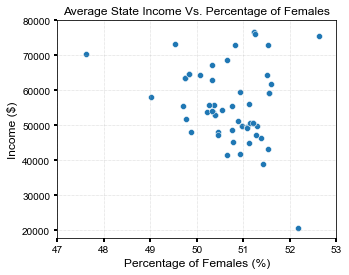

In [5]:
df['prop_females'] = df['Females'] / df['TotalPop']*100
plt.rcParams['font.family'] = 'Arial'
fig, axs = plt.subplots(figsize=(5,4))
sns.scatterplot(data=df, x='prop_females', y='Income')
axs.set_ylabel('Income ($)', fontsize=12)
axs.set_xlabel('Percentage of Females (%)', fontsize=12)
axs.set_xticks(np.arange(47, 54, 1))
axs.set_yticks(np.arange(20000, 90000, 10000))
axs.tick_params(axis='both', which='major', width=2, length=3.5)
axs.grid(linestyle=':', linewidth=0.5)
axs.set_title('Average State Income Vs. Percentage of Females', fontsize=12)
plt.show()

In [6]:
# check for nans in the females col
nan_count = df['Females'].isna().sum()

# fill the nan rows with totalpop - males
df['Females'] = df['Females'].fillna(df['TotalPop'] - df['Males'])

# double check that it worked
nan_count = df['Females'].isna().sum()
#print(nan_count)

In [7]:
# check for duplicate rows
#print(df.duplicated(subset='State'))
# drop the duplicate state row
df = df.drop_duplicates(subset='State').reset_index(drop=True)
df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Males,Females,prop_females
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388,543273.0,51.560511
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409,2455167.0,51.389387
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477,419713.0,49.776800
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756,3331859.0,51.262406
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316,13367298.0,50.369239


#### <span style='color:palegreen'>Remake the scatter plot of Income Vs. Percentage of Females</span>

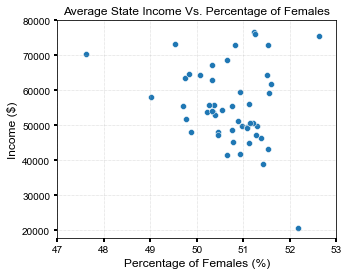

In [8]:
plt.rcParams['font.family'] = 'Arial'
fig, axs = plt.subplots(figsize=(5,4))
sns.scatterplot(data=df, x='prop_females', y='Income')
axs.set_ylabel('Income ($)', fontsize=12)
axs.set_xlabel('Percentage of Females (%)', fontsize=12)
axs.set_xticks(np.arange(47, 54, 1))
axs.set_yticks(np.arange(20000, 90000, 10000))
axs.tick_params(axis='both', which='major', width=2, length=3.5)
axs.grid(linestyle=':', linewidth=0.5)
axs.set_title('Average State Income Vs. Percentage of Females', fontsize=12)
plt.show()

In [9]:
# clean the race cols to get rid of % signs and turn into numeric
cols = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

for col in cols:
    df[col] = df[col].str.replace('%', '')
    df[col] = pd.to_numeric(df[col])

df.dtypes

Unnamed: 0        int64
State            object
TotalPop          int64
Hispanic        float64
White           float64
Black           float64
Native          float64
Asian           float64
Pacific         float64
Income          float64
GenderPop        object
Males             int64
Females         float64
prop_females    float64
dtype: object

#### <span style='color:palegreen'>Create figure with histogram for each race category</span>

In [11]:
# first need to check for NaNs in the race cols
nan_count_dict = {}

for col in cols:
    nan_count_dict[col] = df[col].isna().sum()
    
print(nan_count_dict)

{'Hispanic': 0, 'White': 0, 'Black': 0, 'Native': 0, 'Asian': 0, 'Pacific': 4}


In [13]:
# there's only one col with NaNs - this is ez to fill since all we have to do is take 
# 100% -the % contribution from the other race cols
df['Pacific'] = df['Pacific'].fillna(100 - (df['Hispanic']+df['White']+df['Black']+df['Native']+df['Asian']))

0


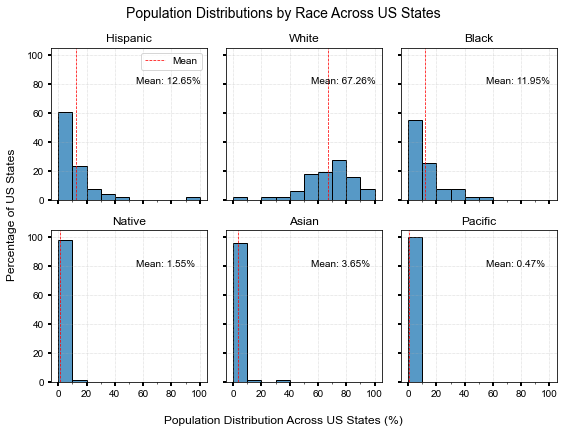

In [56]:
cols = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

binwidth = 10
binrange = [0, 100]

plt.rcParams['font.family'] = 'Arial'
fig, axs = plt.subplots(2, 3, figsize=(8, 6), sharex=True, sharey=True)
axs = axs.flatten()

for i, col in enumerate(cols):
    subset = df[col]
    col_mean = subset.mean()
    sns.histplot(data=df, x=col, stat='percent', binwidth=binwidth, binrange=binrange, edgecolor='black', ax=axs[i])
    axs[i].axvline(col_mean, color='red', linestyle='--', linewidth=0.75, label='Mean')
    axs[i].set_title(f'{col}', fontsize=12)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].set_xticks(np.arange(0, 120, 20))
    axs[i].xaxis.set_minor_locator(MultipleLocator(10))
    axs[i].set_yticks(np.arange(0, 120, 20))
    axs[i].tick_params(axis='both', which='major', width=2, length=3.5)
    axs[i].grid(linestyle=':', linewidth=0.5)
    axs[0].legend()
    axs[i].text(x=55, y=80, s=f'Mean: {col_mean:.2f}%')
    
    

fig.supxlabel('Population Distribution Across US States (%)', fontsize=12)
fig.supylabel('Percentage of US States', fontsize=12)
fig.suptitle('Population Distributions by Race Across US States', fontsize=14)
plt.tight_layout()
plt.show()